# PCA Zusammenführung

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dsc_path = "../data/010_dsc.csv"

## 1) Einlesen der Daten

In [3]:
# Einlesen der CSV-Datei
df_experiments_pca = pd.read_csv("data/pca_simple.csv", index_col=0)
df_experiments_pca

,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,267,268,269,270,271,272,273,274,PCA1,PCA2
L001,-1.895041,-1.882417,-1.867989,-1.850984,-1.830373,-1.806670,-1.783225,-1.765190,-1.745609,-1.726028,...,1.536238,1.548089,1.557107,1.568443,1.580295,1.592404,1.603225,1.611469,-7.216422,-2.024340
L002,-1.897818,-1.881884,-1.865950,-1.848126,-1.825441,-1.803565,-1.784931,-1.766566,-1.750092,-1.733618,...,1.506355,1.522558,1.543353,1.561448,1.578732,1.594396,1.609519,1.624643,-7.686041,-1.229176
L003,-1.855503,-1.836973,-1.818703,-1.803566,-1.787906,-1.768071,-1.744321,-1.722658,-1.704650,-1.685336,...,1.593247,1.605253,1.613344,1.622739,1.637877,1.654580,1.673894,1.689553,-7.567047,-1.720351
L004,-1.765930,-1.754211,-1.737699,-1.719323,-1.702012,-1.687897,-1.674847,-1.657270,-1.641824,-1.624513,...,1.632073,1.637133,1.646188,1.661635,1.674152,1.683739,1.697854,1.711970,-8.123176,-1.010625
L005,-1.863076,-1.848531,-1.827214,-1.807151,-1.790098,-1.770788,-1.751227,-1.732669,-1.715867,-1.701321,...,1.469074,1.489137,1.506441,1.521990,1.532021,1.541049,1.548322,1.557099,-7.139745,-2.001867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383,-1.750991,-1.737117,-1.727466,-1.711984,-1.700925,-1.687856,-1.672574,-1.657092,-1.643017,-1.628340,...,1.653088,1.662940,1.670782,1.683449,1.692899,1.701545,1.714413,1.726477,-9.339763,1.865182
L384,-1.644064,-1.634867,-1.624793,-1.612968,-1.600997,-1.590339,-1.579974,-1.568878,-1.556761,-1.546541,...,1.750405,1.763544,1.770698,1.779895,1.798728,1.813328,1.822963,1.830263,-9.528098,1.940966
L385,-1.744776,-1.734210,-1.724028,-1.711348,-1.698476,-1.686181,-1.671004,-1.656788,-1.644300,-1.632582,...,1.606834,1.618169,1.631809,1.639878,1.656208,1.668887,1.679261,1.676956,-9.048770,1.181946
L386,-1.698102,-1.685843,-1.672547,-1.660633,-1.649582,-1.638531,-1.621091,-1.607278,-1.599508,-1.586903,...,1.675872,1.689858,1.707298,1.714896,1.723702,1.736652,1.744940,1.756164,-9.254760,1.390317


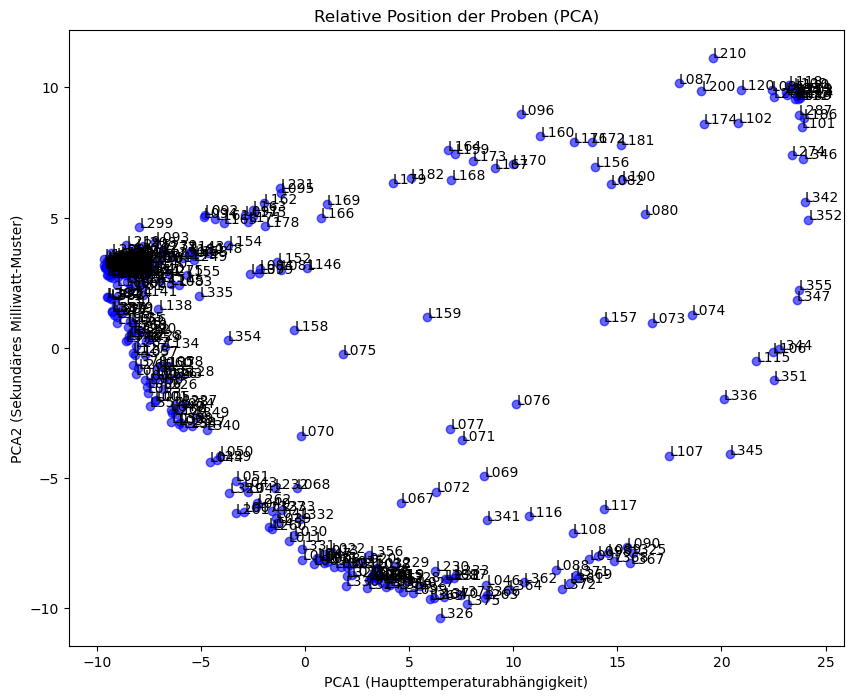

In [4]:
# Visualisierung der PCA-Ergebnisse
plt.figure(figsize=(10, 8))
plt.scatter(df_experiments_pca["PCA1"], df_experiments_pca["PCA2"], c='blue', alpha=0.6)
plt.title("Relative Position der Proben (PCA)")
plt.xlabel("PCA1 (Haupttemperaturabhängigkeit)")
plt.ylabel("PCA2 (Sekundäres Milliwatt-Muster)")

# Beschriftung der Punkte mit den Probenbezeichnungen
for i, txt in enumerate(df_experiments_pca.index):
    plt.annotate(txt, (df_experiments_pca["PCA1"].iloc[i], df_experiments_pca["PCA2"].iloc[i]))

plt.show()

In [5]:
df_dsc = pd.read_csv(dsc_path, index_col=0)
df_dsc

,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Masse Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
Nummer,,,,,,,,,
L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.34,5.675,130.7
L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.49,4.522,130.8
L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,7.86,5.084,130.7
L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.59,4.175,130.3
L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.39,5.796,130.5
...,...,...,...,...,...,...,...,...,...
L371,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,NaN,1.05,147.800,130.5
L372,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,NaN,1.09,150.600,130.5
L373,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,NaN,NaN,1.00,144.900,130.6


In [6]:
merged_df = df_dsc.join(df_experiments_pca, how="left")
merged_df

,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Masse Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C,-24,...,267,268,269,270,271,272,273,274,PCA1,PCA2
Nummer,,,,,,,,,,,,,,,,,,,,,
L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.34,5.675,130.7,-1.895041,...,1.536238,1.548089,1.557107,1.568443,1.580295,1.592404,1.603225,1.611469,-7.216422,-2.024340
L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.49,4.522,130.8,-1.897818,...,1.506355,1.522558,1.543353,1.561448,1.578732,1.594396,1.609519,1.624643,-7.686041,-1.229176
L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,7.86,5.084,130.7,-1.855503,...,1.593247,1.605253,1.613344,1.622739,1.637877,1.654580,1.673894,1.689553,-7.567047,-1.720351
L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.59,4.175,130.3,-1.765930,...,1.632073,1.637133,1.646188,1.661635,1.674152,1.683739,1.697854,1.711970,-8.123176,-1.010625
L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.39,5.796,130.5,-1.863076,...,1.469074,1.489137,1.506441,1.521990,1.532021,1.541049,1.548322,1.557099,-7.139745,-2.001867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L371,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,NaN,1.05,147.800,130.5,-0.303255,...,-0.520831,-0.519566,-0.523162,-0.528224,-0.530289,-0.534052,-0.537399,-0.536250,12.994836,-8.718154
L372,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,NaN,1.09,150.600,130.5,-0.312935,...,-0.408724,-0.409912,-0.408041,-0.410668,-0.414557,-0.415255,-0.411589,-0.411544,12.352387,-9.245870
L373,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,NaN,NaN,1.00,144.900,130.6,-1.040133,...,0.085897,0.089124,0.093847,0.092571,0.093304,0.096546,0.095548,0.103586,7.492540,-9.493815


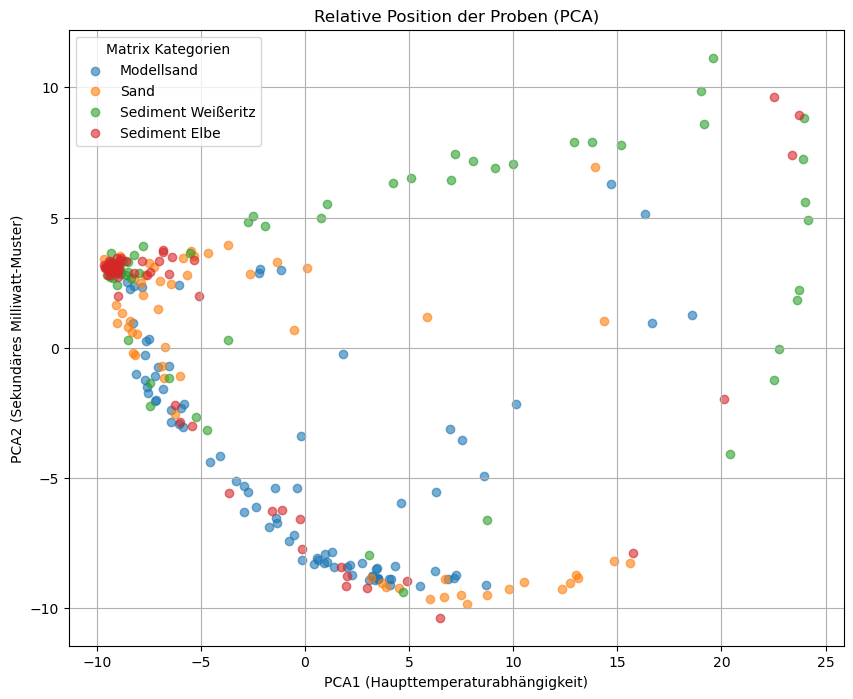

In [7]:
# Unique categories in the "Matrix" column
unique_categories = merged_df["Matrix"].unique()

# Assign colors to categories
colors = plt.cm.tab10(range(len(unique_categories)))  # Use a colormap with enough distinct colors
category_color_map = {category: colors[i] for i, category in enumerate(unique_categories)}

# Map the colors to the "Matrix" column
merged_df["Color_Code"] = merged_df["Matrix"].map(category_color_map)

# Plotting
plt.figure(figsize=(10, 8))
for category, color in category_color_map.items():
    subset = merged_df[merged_df["Matrix"] == category]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=category, color=color, alpha=0.6)

# Add legend
plt.legend(title="Matrix Kategorien", loc='best')
plt.title("Relative Position der Proben (PCA)")
plt.xlabel("PCA1 (Haupttemperaturabhängigkeit)")
plt.ylabel("PCA2 (Sekundäres Milliwatt-Muster)")
plt.grid(True)
plt.show()


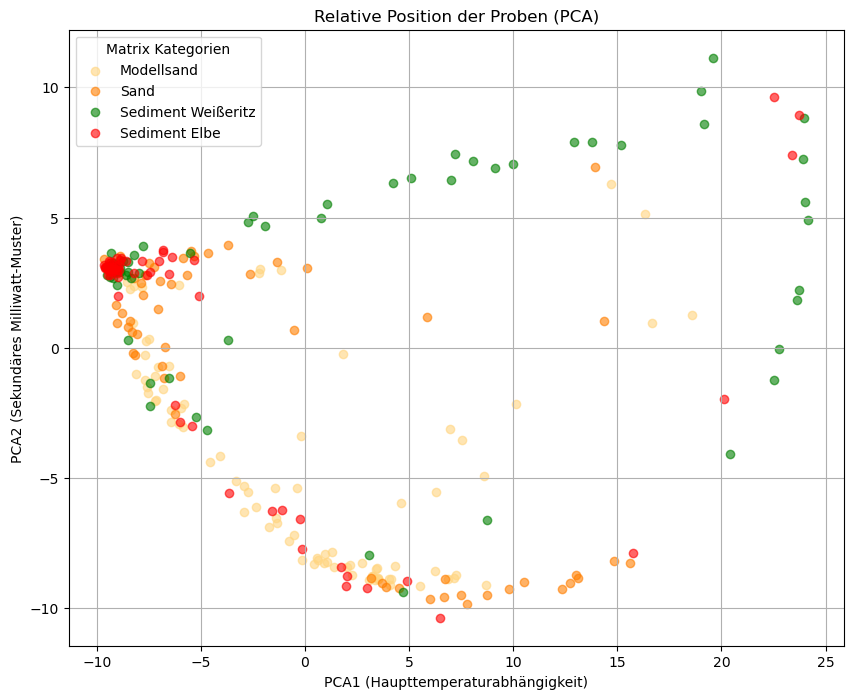

In [8]:
category_color_map = {
    "Modellsand": "#FFD580",  # Helles Orange
    "Sand": "#FF7F00",        # Dunkleres Orange
    "Sediment Weißeritz": "green",
    "Sediment Elbe": "red"
}

# Map the colors to the "Matrix" column
merged_df["Color_Code"] = merged_df["Matrix"].map(category_color_map)

# Plotting
plt.figure(figsize=(10, 8))
for category, color in category_color_map.items():
    subset = merged_df[merged_df["Matrix"] == category]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=category, color=color, alpha=0.6)

# Add legend
plt.legend(title="Matrix Kategorien", loc='best')
plt.title("Relative Position der Proben (PCA)")
plt.xlabel("PCA1 (Haupttemperaturabhängigkeit)")
plt.ylabel("PCA2 (Sekundäres Milliwatt-Muster)")
plt.grid(True)
plt.show()
